## Hipótese: a região dos consumidores afeta se eles voltam a comprar ou não

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Carregamento dos dados

In [10]:
all_orders = pd.read_csv("../datasets/trusted/all_orders.csv", index_col=0)
all_orders.count()

order_id                         99441
customer_unique_id               99441
customer_city                    99441
customer_state                   99441
order_approved_at                99281
order_purchase_timestamp         99441
order_estimated_delivery_date    99441
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
dtype: int64

In [11]:
more_than_once = pd.read_csv("../datasets/trusted/more_than_once.csv", index_col=0)
more_than_once.count()

order_id                         2997
customer_unique_id               2997
customer_city                    2997
customer_state                   2997
order_approved_at                2992
order_purchase_timestamp         2997
order_estimated_delivery_date    2997
order_delivered_carrier_date     2953
order_delivered_customer_date    2917
dtype: int64

### Análise por estado

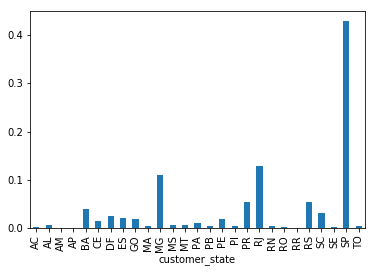

In [4]:
mto_by_state = more_than_once.groupby(['customer_state']).agg('count')['order_id']
(mto_by_state / more_than_once.count()[0]).plot.bar()

A maior parte dos clientes que volta é do estado de são paulo.

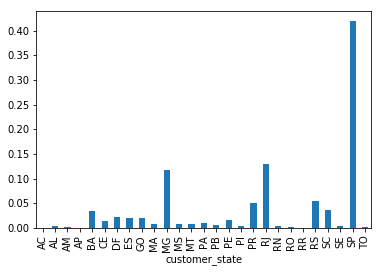

In [5]:
all_by_state = all_orders.groupby(['customer_state']).agg('count')['order_id']
(all_by_state / all_orders.count()[0]).plot.bar()

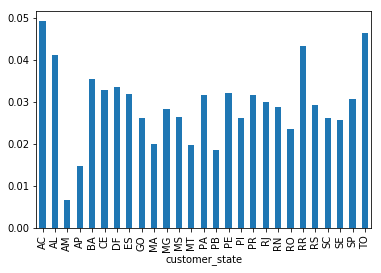

In [6]:
(mto_by_state / all_by_state).plot.bar()

In [7]:
pd.DataFrame({'mto': mto_by_state, 'all': all_by_state }).corr()['mto']['all']

0.9994653387646663

In [8]:
print(stats.kruskal(all_by_state / all_orders.count()[0], mto_by_state / more_than_once.count()[0]).pvalue * 100, '%', sep='')

88.30838631048043%


Fazendo uma análise da quantidade de clientes por estado, porém, percebe-se que a distribuição é quase exatamente a mesma. O P-Value para o teste de kruskal também é alto, indicando alta probabilidade de que a distribuição é idêntica.

É razoável assumir que o estado não tem nenhum tipo de efeito em se o cliente volta a comprar ou não.